In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("rv2_podatkovna_zbirka.csv") 
df = df.drop(df.columns[0], axis=1)
df.head()

,time,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
0,3/29/2022 3:50,4.0,3.7,4.2,66,64,68,4.0,67,NaN,0.6,354.0,1.1,NaN,NaN
1,12/28/2017 19:30,0.3,0.3,0.4,96,96,97,0.3,96,0.2,0.4,208.0,0.8,0.0,0.0
2,4/13/2018 22:10,10.0,9.5,10.4,63,59,67,9.6,65,NaN,2.2,15.0,3.6,NaN,NaN
3,5/13/2021 11:40,17.2,17.1,17.3,57,54,61,17.1,58,NaN,0.9,24.0,2.9,NaN,NaN
4,10/14/2022 2:40,7.3,7.2,7.3,98,97,99,7.3,99,NaN,0.3,342.0,0.5,NaN,NaN


In [3]:
df['time'] = pd.to_datetime(df['time'])
df.head() 

,time,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
0,2022-03-29 03:50:00,4.0,3.7,4.2,66,64,68,4.0,67,NaN,0.6,354.0,1.1,NaN,NaN
1,2017-12-28 19:30:00,0.3,0.3,0.4,96,96,97,0.3,96,0.2,0.4,208.0,0.8,0.0,0.0
2,2018-04-13 22:10:00,10.0,9.5,10.4,63,59,67,9.6,65,NaN,2.2,15.0,3.6,NaN,NaN
3,2021-05-13 11:40:00,17.2,17.1,17.3,57,54,61,17.1,58,NaN,0.9,24.0,2.9,NaN,NaN
4,2022-10-14 02:40:00,7.3,7.2,7.3,98,97,99,7.3,99,NaN,0.3,342.0,0.5,NaN,NaN


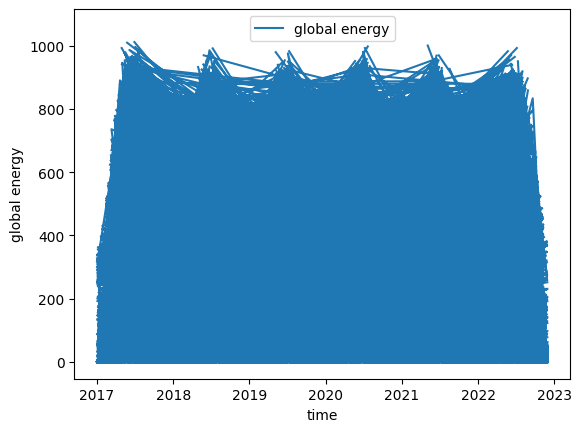

In [4]:
import matplotlib.pyplot as plt

time = df["time"]
globalEnergy = df["global energy"]

plt.plot(time, globalEnergy, label="global energy")

plt.xlabel("time")
plt.ylabel("global energy")
plt.legend()

plt.show()

In [5]:
df = df.sort_values(by='time')
df

,time,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
259287,2017-01-01 00:00:00,-6.7,-6.8,-6.6,90,90,91,-6.8,90,0.0,0.3,298.0,0.6,0.0,0.0
96262,2017-01-01 00:10:00,-6.7,-6.8,-6.6,91,90,91,-6.8,91,NaN,0.2,284.0,0.4,NaN,NaN
168203,2017-01-01 00:20:00,-7.0,-7.1,-6.8,91,90,91,-7.0,91,NaN,0.2,298.0,0.4,NaN,NaN
60638,2017-01-01 00:30:00,-7.0,-7.1,-6.9,91,91,92,-7.1,91,0.0,0.2,239.0,0.4,0.0,0.0
64111,2017-01-01 00:40:00,-7.0,-7.1,-6.9,91,91,92,-6.9,92,NaN,0.3,314.0,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147,2022-11-30 23:10:00,1.0,1.0,1.0,96,95,97,1.0,96,NaN,0.3,295.0,1.3,NaN,NaN
176675,2022-11-30 23:20:00,1.0,0.9,1.0,96,95,97,0.9,97,NaN,0.5,294.0,1.8,NaN,NaN
306808,2022-11-30 23:30:00,0.9,0.9,1.0,96,95,97,0.9,96,0.4,0.5,268.0,1.5,0.0,0.0
265483,2022-11-30 23:40:00,0.9,0.9,0.9,96,95,97,0.9,96,NaN,0.2,207.0,0.5,NaN,NaN


In [6]:
df.isna().sum()

time                     0
mean T                   0
min T                    0
max T                    0
mean rel. hum.           0
min rel. hum.            0
max rel. hum.            0
T                        0
rel. hum.                0
precipitation       207360
wind speed            4541
wind direction        2307
max gust              2661
global energy       207360
diffusive energy    207373
dtype: int64

In [7]:
df[['precipitation', 'wind speed', 'wind direction', 'max gust', 'diffusive energy']] = df[['precipitation', 'wind speed', 'wind direction', 'max gust', 'diffusive energy']].fillna(value=df.mean(numeric_only=True))

In [8]:
df.isna().sum()

time                     0
mean T                   0
min T                    0
max T                    0
mean rel. hum.           0
min rel. hum.            0
max rel. hum.            0
T                        0
rel. hum.                0
precipitation            0
wind speed               0
wind direction           0
max gust                 0
global energy       207360
diffusive energy         0
dtype: int64

In [9]:
df.dtypes

time                datetime64[ns]
mean T                     float64
min T                      float64
max T                      float64
mean rel. hum.               int64
min rel. hum.                int64
max rel. hum.                int64
T                          float64
rel. hum.                    int64
precipitation              float64
wind speed                 float64
wind direction             float64
max gust                   float64
global energy              float64
diffusive energy           float64
dtype: object

In [10]:
y = df[df['global energy'].isna()]
y

,time,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
96262,2017-01-01 00:10:00,-6.7,-6.8,-6.6,91,90,91,-6.8,91,0.04963,0.2,284.0,0.4,NaN,57.505195
168203,2017-01-01 00:20:00,-7.0,-7.1,-6.8,91,90,91,-7.0,91,0.04963,0.2,298.0,0.4,NaN,57.505195
64111,2017-01-01 00:40:00,-7.0,-7.1,-6.9,91,91,92,-6.9,92,0.04963,0.3,314.0,0.5,NaN,57.505195
261695,2017-01-01 00:50:00,-7.0,-7.1,-6.9,91,90,92,-7.1,91,0.04963,0.2,201.0,0.5,NaN,57.505195
104808,2017-01-01 01:10:00,-7.4,-7.5,-7.3,92,91,94,-7.4,92,0.04963,0.2,165.0,0.5,NaN,57.505195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253453,2022-11-30 22:50:00,0.9,0.9,1.0,96,95,97,0.9,97,0.04963,0.4,298.0,1.2,NaN,57.505195
300147,2022-11-30 23:10:00,1.0,1.0,1.0,96,95,97,1.0,96,0.04963,0.3,295.0,1.3,NaN,57.505195
176675,2022-11-30 23:20:00,1.0,0.9,1.0,96,95,97,0.9,97,0.04963,0.5,294.0,1.8,NaN,57.505195
265483,2022-11-30 23:40:00,0.9,0.9,0.9,96,95,97,0.9,96,0.04963,0.2,207.0,0.5,NaN,57.505195


In [11]:
X = df.dropna()
X

,time,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
259287,2017-01-01 00:00:00,-6.7,-6.8,-6.6,90,90,91,-6.8,90,0.0,0.3,298.0,0.6,0.0,0.0
60638,2017-01-01 00:30:00,-7.0,-7.1,-6.9,91,91,92,-7.1,91,0.0,0.2,239.0,0.4,0.0,0.0
159357,2017-01-01 01:00:00,-7.3,-7.4,-7.1,91,90,92,-7.3,91,0.0,0.2,202.0,0.6,0.0,0.0
308195,2017-01-01 01:30:00,-7.2,-7.4,-7.0,92,91,93,-7.2,92,0.0,0.3,26.0,0.7,0.0,0.0
229290,2017-01-01 02:00:00,-7.3,-7.3,-7.1,91,90,92,-7.3,91,0.0,0.2,154.0,1.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,2022-11-30 21:30:00,1.4,1.4,1.4,96,96,98,1.4,96,0.5,0.5,281.0,1.2,0.0,0.0
260623,2022-11-30 22:00:00,1.2,1.1,1.2,96,95,97,1.1,96,0.5,0.3,272.0,0.6,0.0,0.0
28218,2022-11-30 22:30:00,1.0,1.0,1.1,96,95,97,1.0,95,0.4,0.2,314.0,0.5,0.0,0.0
161810,2022-11-30 23:00:00,1.0,0.9,1.0,96,95,97,1.0,97,0.4,0.2,217.0,0.7,0.0,0.0


In [12]:
X.isna().sum()

time                0
mean T              0
min T               0
max T               0
mean rel. hum.      0
min rel. hum.       0
max rel. hum.       0
T                   0
rel. hum.           0
precipitation       0
wind speed          0
wind direction      0
max gust            0
global energy       0
diffusive energy    0
dtype: int64

In [13]:
X_train = X.drop(['global energy','time'],axis=1)
y_train = X['global energy']
X_test = y.drop(['global energy','time'],axis=1)

In [14]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)


[ 85.13  84.39  97.43 ... 100.84  81.54  89.95]


In [15]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

In [16]:
df.isna().sum()

time                     0
mean T                   0
min T                    0
max T                    0
mean rel. hum.           0
min rel. hum.            0
max rel. hum.            0
T                        0
rel. hum.                0
precipitation            0
wind speed               0
wind direction           0
max gust                 0
global energy       207360
diffusive energy         0
dtype: int64

In [17]:
df.loc[df['global energy'].isnull(), 'global energy'] = y_pred
df

,time,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
259287,2017-01-01 00:00:00,-6.7,-6.8,-6.6,90,90,91,-6.8,90,0.00000,0.3,298.0,0.6,0.00,0.000000
96262,2017-01-01 00:10:00,-6.7,-6.8,-6.6,91,90,91,-6.8,91,0.04963,0.2,284.0,0.4,85.13,57.505195
168203,2017-01-01 00:20:00,-7.0,-7.1,-6.8,91,90,91,-7.0,91,0.04963,0.2,298.0,0.4,84.39,57.505195
60638,2017-01-01 00:30:00,-7.0,-7.1,-6.9,91,91,92,-7.1,91,0.00000,0.2,239.0,0.4,0.00,0.000000
64111,2017-01-01 00:40:00,-7.0,-7.1,-6.9,91,91,92,-6.9,92,0.04963,0.3,314.0,0.5,97.43,57.505195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300147,2022-11-30 23:10:00,1.0,1.0,1.0,96,95,97,1.0,96,0.04963,0.3,295.0,1.3,93.16,57.505195
176675,2022-11-30 23:20:00,1.0,0.9,1.0,96,95,97,0.9,97,0.04963,0.5,294.0,1.8,100.84,57.505195
306808,2022-11-30 23:30:00,0.9,0.9,1.0,96,95,97,0.9,96,0.40000,0.5,268.0,1.5,0.00,0.000000
265483,2022-11-30 23:40:00,0.9,0.9,0.9,96,95,97,0.9,96,0.04963,0.2,207.0,0.5,81.54,57.505195


In [18]:
df.isna().sum()

time                0
mean T              0
min T               0
max T               0
mean rel. hum.      0
min rel. hum.       0
max rel. hum.       0
T                   0
rel. hum.           0
precipitation       0
wind speed          0
wind direction      0
max gust            0
global energy       0
diffusive energy    0
dtype: int64

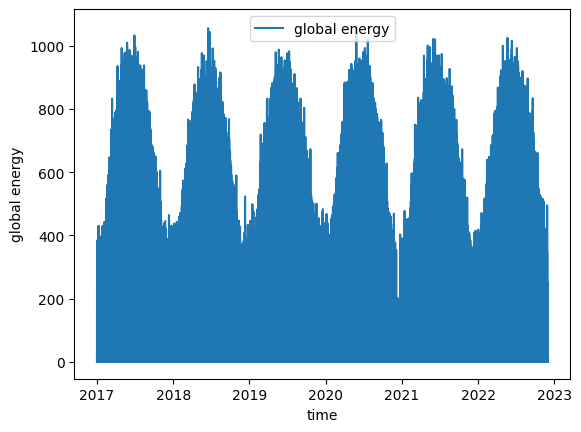

In [19]:
import matplotlib.pyplot as plt

time = df["time"]
globalEnergy = df["global energy"]

plt.plot(time, globalEnergy, label="global energy")

plt.xlabel("time")
plt.ylabel("global energy")
plt.legend()

plt.show()

In [20]:
df.head()

,time,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
259287,2017-01-01 00:00:00,-6.7,-6.8,-6.6,90,90,91,-6.8,90,0.00000,0.3,298.0,0.6,0.00,0.000000
96262,2017-01-01 00:10:00,-6.7,-6.8,-6.6,91,90,91,-6.8,91,0.04963,0.2,284.0,0.4,85.13,57.505195
168203,2017-01-01 00:20:00,-7.0,-7.1,-6.8,91,90,91,-7.0,91,0.04963,0.2,298.0,0.4,84.39,57.505195
60638,2017-01-01 00:30:00,-7.0,-7.1,-6.9,91,91,92,-7.1,91,0.00000,0.2,239.0,0.4,0.00,0.000000
64111,2017-01-01 00:40:00,-7.0,-7.1,-6.9,91,91,92,-6.9,92,0.04963,0.3,314.0,0.5,97.43,57.505195


In [21]:
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:ylabel='Frequency'>

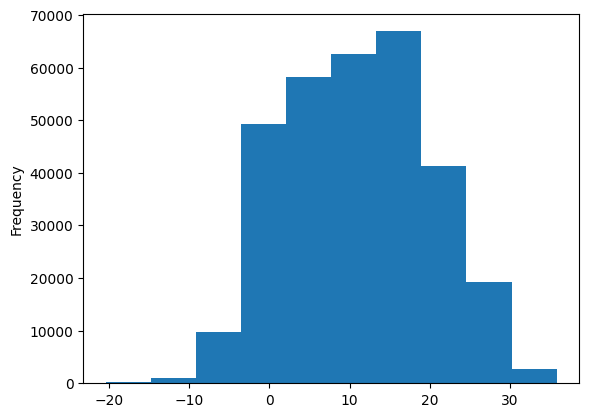

In [22]:
fig = plt.figure()
df['mean T'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

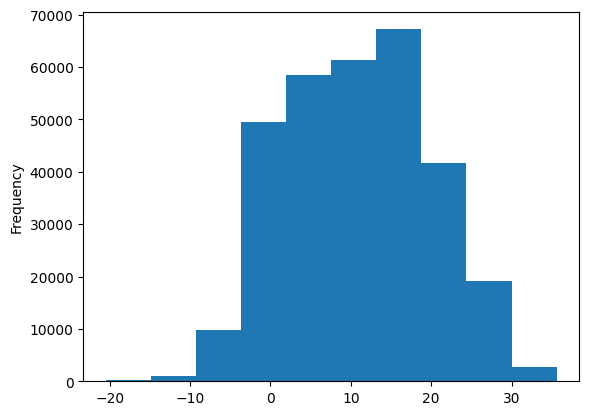

In [23]:
fig = plt.figure()
df['min T'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

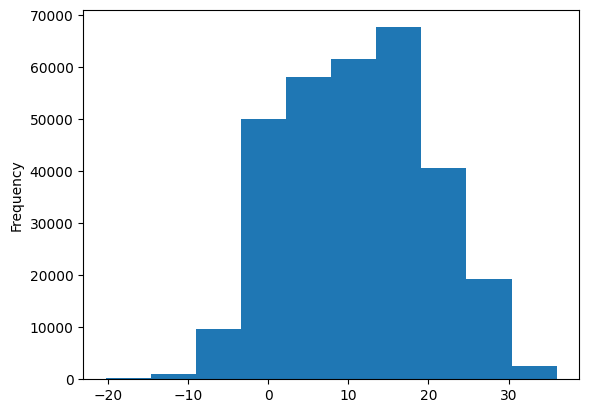

In [24]:
fig = plt.figure()
df['max T'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

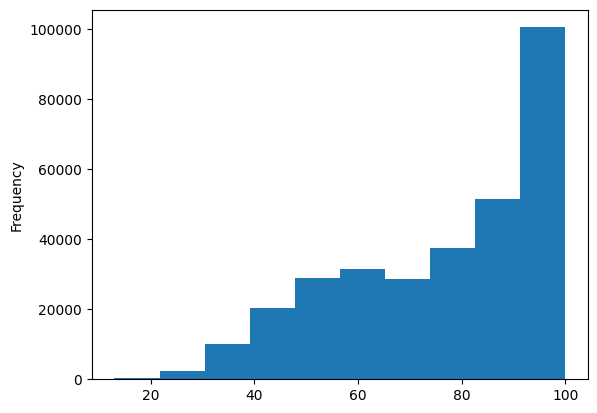

In [25]:
fig = plt.figure()
df['mean rel. hum.'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

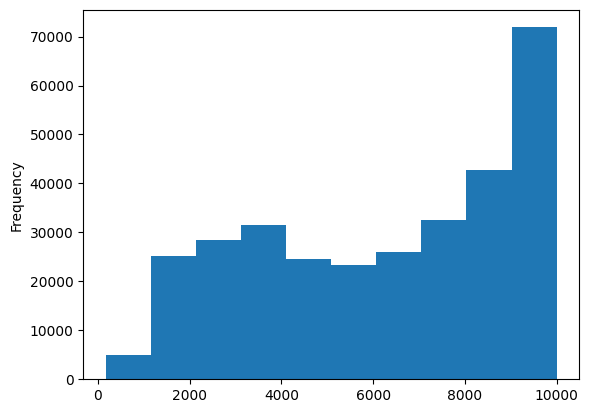

In [26]:
df['mean rel. hum.'] = df['mean rel. hum.']**2

fig = plt.figure()
df['mean rel. hum.'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

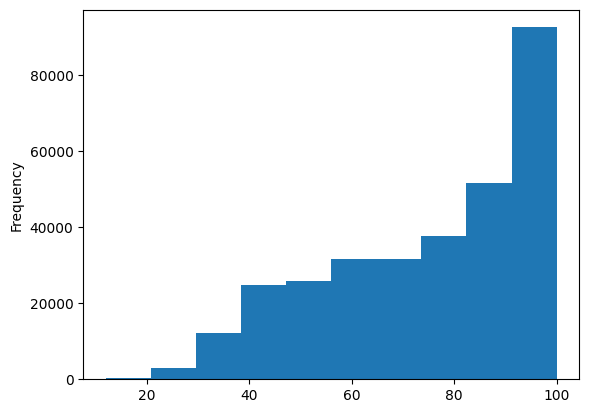

In [27]:
fig = plt.figure()
df['min rel. hum.'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

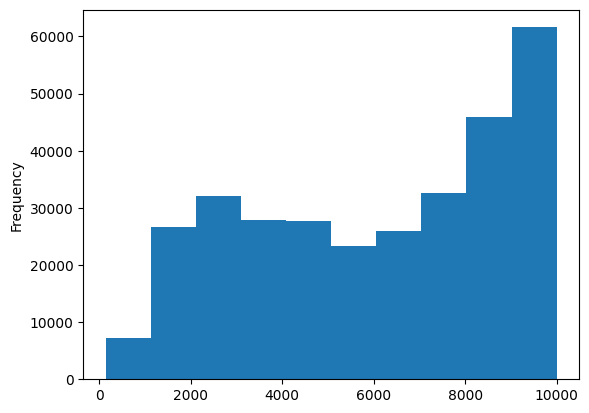

In [28]:
df['min rel. hum.'] = df['min rel. hum.']**2

fig = plt.figure()
df['min rel. hum.'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

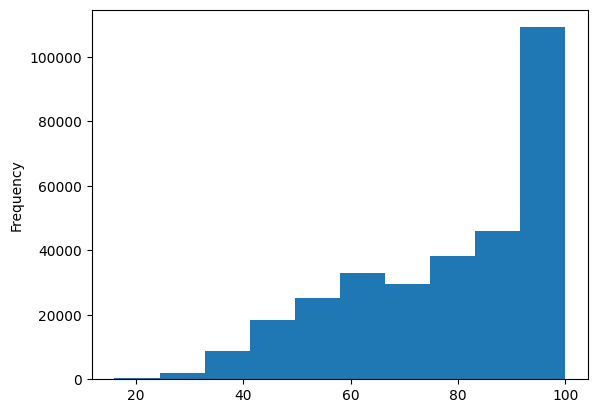

In [29]:
fig = plt.figure()
df['max rel. hum.'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

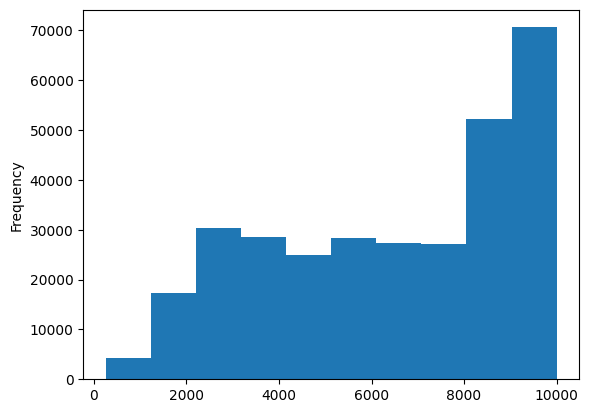

In [30]:
df['max rel. hum.'] = df['max rel. hum.']**2

fig = plt.figure()
df['max rel. hum.'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

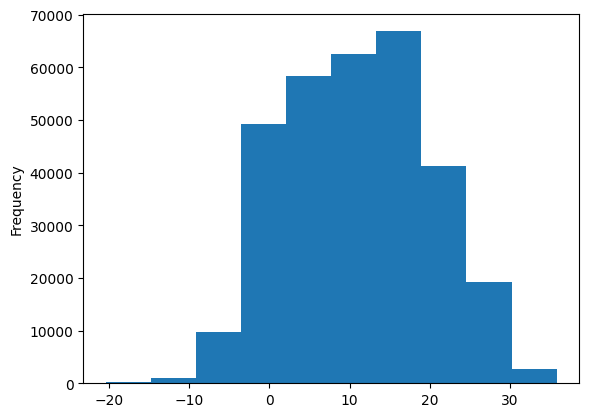

In [31]:
fig = plt.figure()
df['T'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

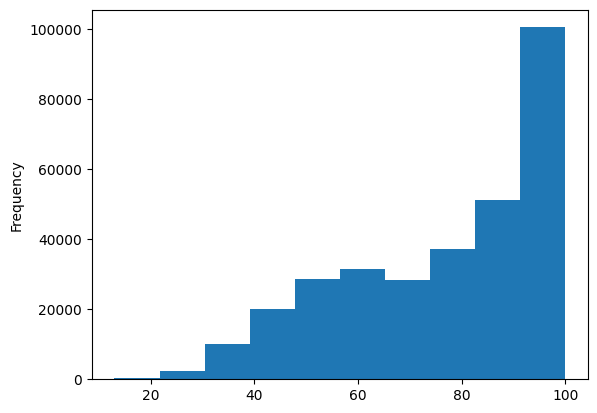

In [32]:
fig = plt.figure()
df['rel. hum.'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

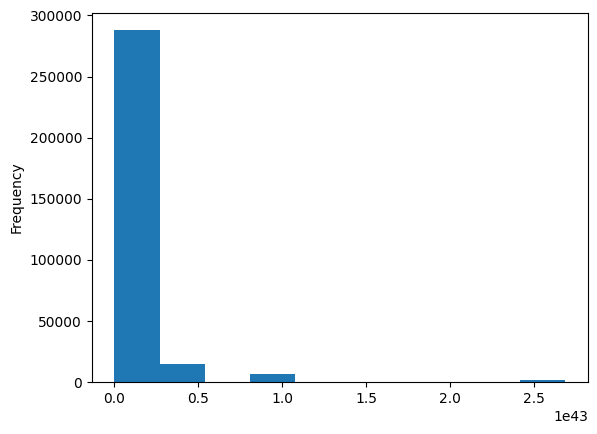

In [33]:
df['rel. hum.'] = np.exp(df['rel. hum.'])

fig = plt.figure()
df['rel. hum.'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

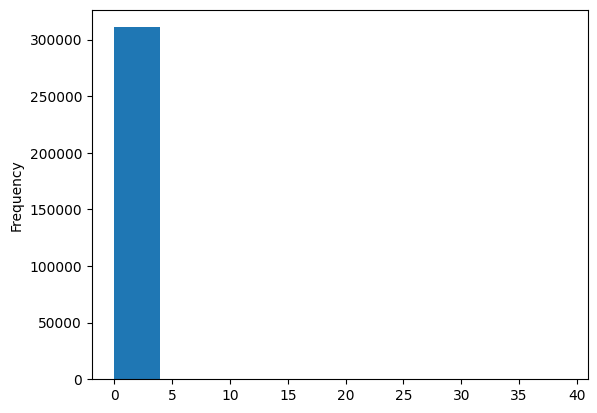

In [34]:
fig = plt.figure()
df['precipitation'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

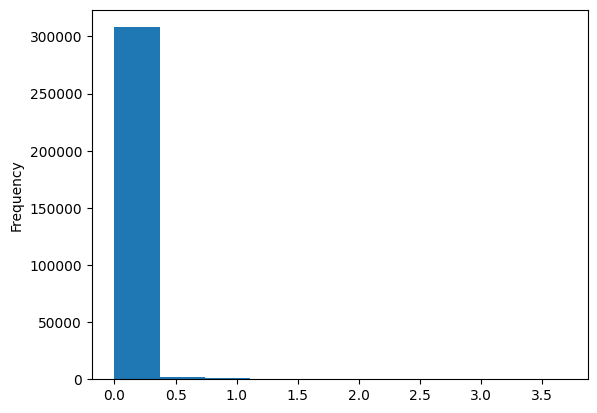

In [35]:
df['precipitation'] = np.log(df['precipitation']+1)
fig = plt.figure()

df['precipitation'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

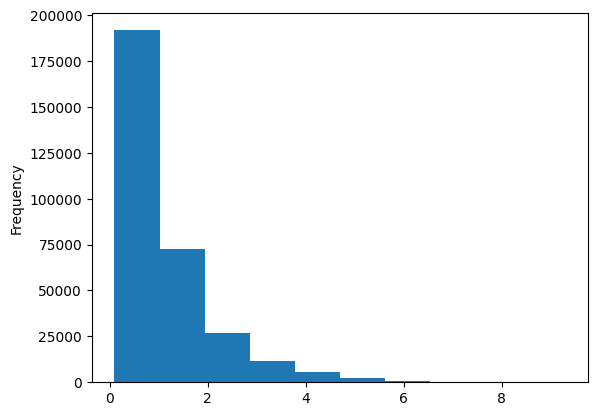

In [36]:
fig = plt.figure()
df['wind speed'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

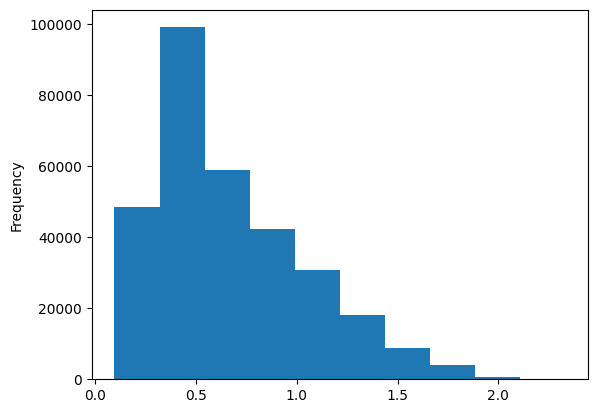

In [37]:
df['wind speed'] = np.log(df['wind speed']+1)

fig = plt.figure()
df['wind speed'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

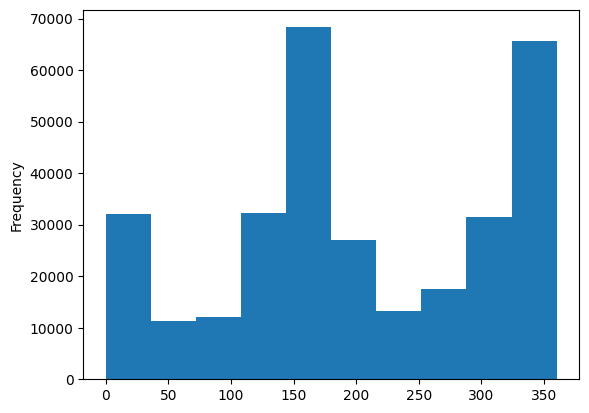

In [38]:
fig = plt.figure()
df['wind direction'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

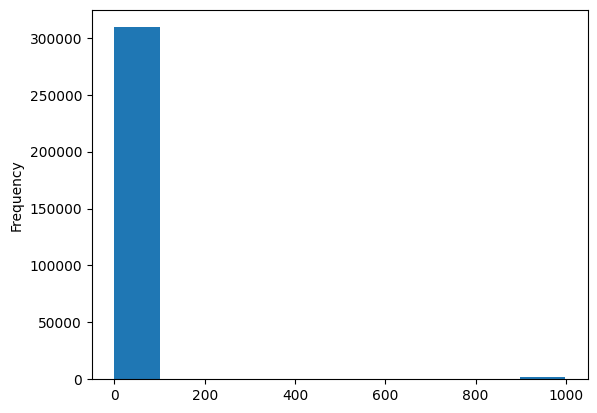

In [39]:
fig = plt.figure()
df['max gust'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

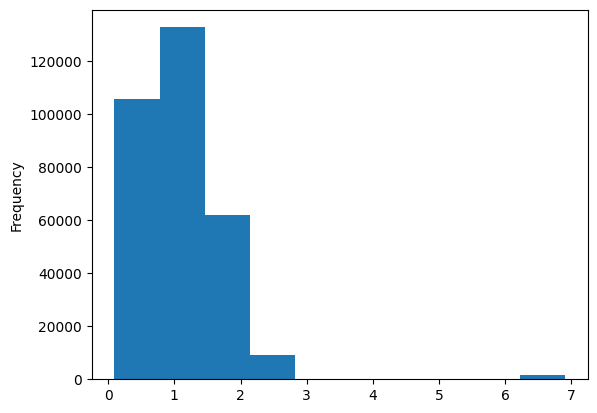

In [40]:
df['max gust'] = np.log(df['max gust']+1)

fig = plt.figure()
df['max gust'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

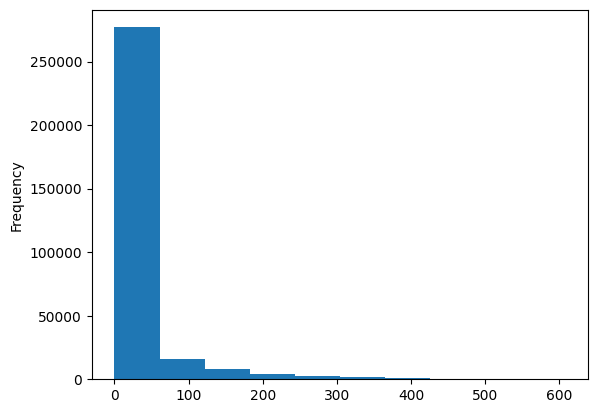

In [41]:
fig = plt.figure()
df['diffusive energy'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

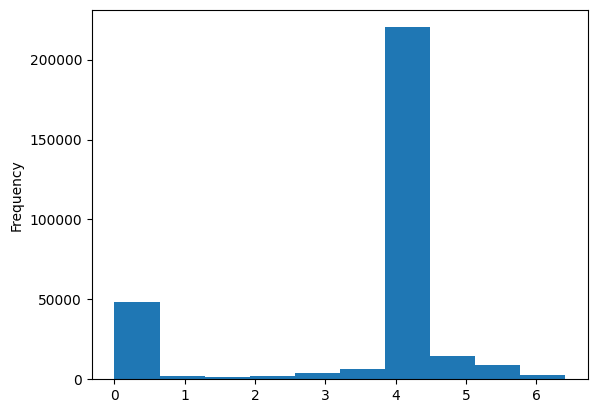

In [42]:
df['diffusive energy'] = np.log(df['diffusive energy']+1)

fig = plt.figure()
df['diffusive energy'].plot(kind='hist')

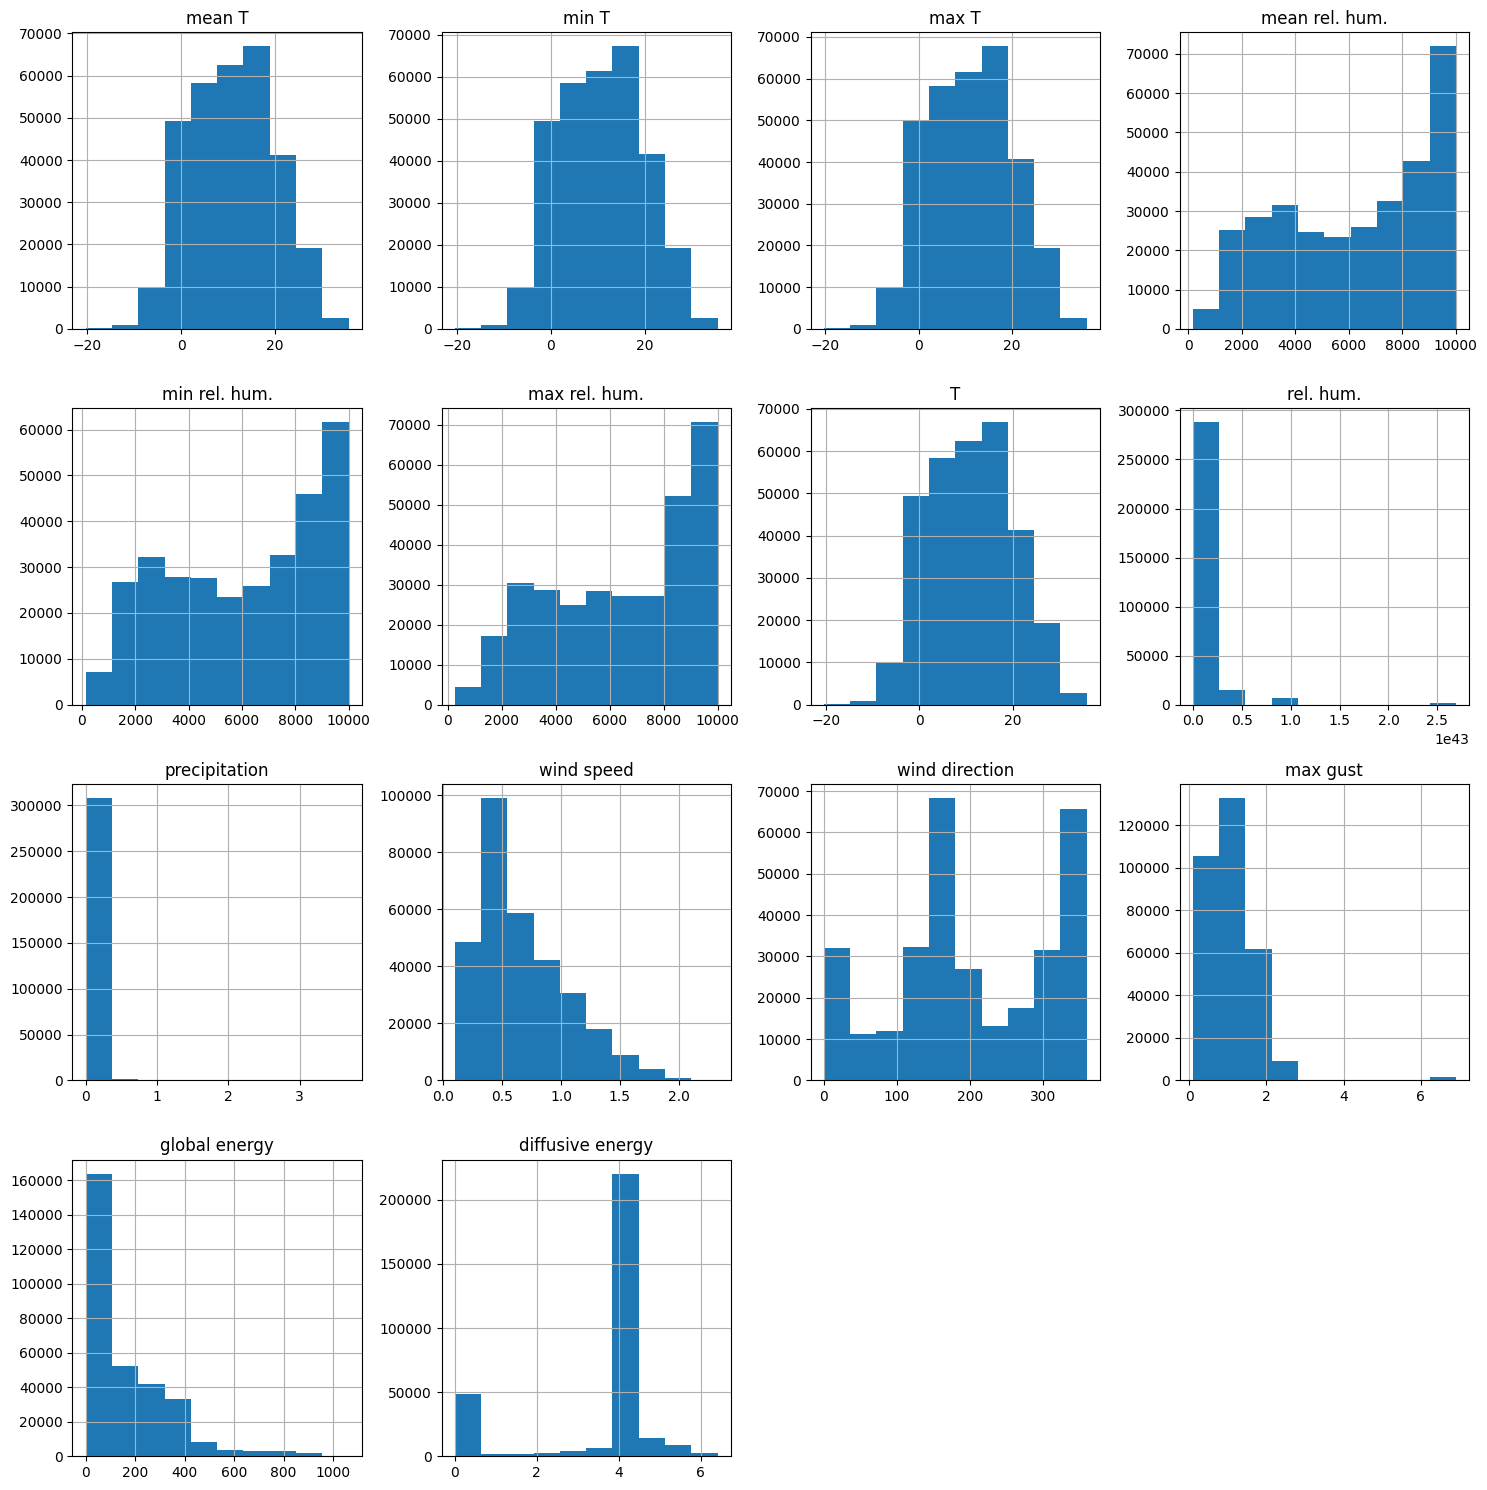

In [43]:
df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

In [44]:
df.skew()

mean T               0.043283
min T                0.040654
max T                0.046255
mean rel. hum.      -0.332067
min rel. hum.       -0.288618
max rel. hum.       -0.378155
T                    0.043410
rel. hum.            7.224510
precipitation       12.463425
wind speed           0.879265
wind direction      -0.132292
max gust             4.040638
global energy        1.650367
diffusive energy    -1.538857
dtype: float64

<AxesSubplot:>

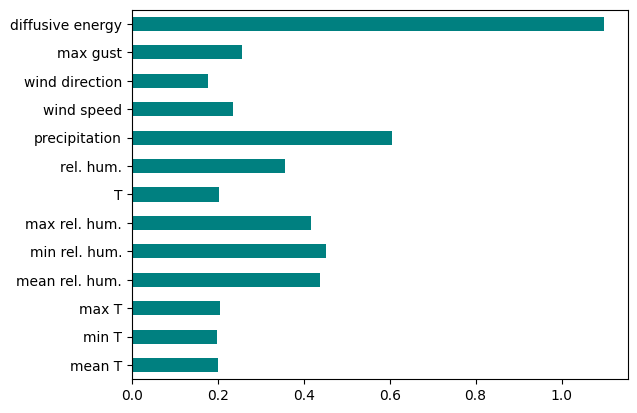

In [45]:
from sklearn.feature_selection import mutual_info_regression
from numpy import asarray

X = df.drop(['time','global energy'], axis = 1)
Y = df['global energy']

importances = mutual_info_regression(X,Y) # X predstavlja vhod, Y je napovedni razred
feat_importances = pd.Series(importances, X.columns)
feat_importances.sort_values(ascending=False)
feat_importances.plot(kind='barh', color='teal')

In [46]:
#kombinirane znacilnice
df['combined_feature'] = df['precipitation'] + df['max gust']
df['combined_feature']

259287    0.470004
96262     0.384910
168203    0.384910
60638     0.336472
64111     0.453902
            ...   
300147    0.881346
176675    1.078057
306808    1.252763
265483    0.453902
282022    0.636224
Name: combined_feature, Length: 311040, dtype: float64

In [47]:
#staticne znacilnice 
df['T_std'] = (df['T'] - df['T'].mean()) / df['T'].std()
df['T_std']

259287   -1.991130
96262    -1.991130
168203   -2.013498
60638    -2.024682
64111    -2.002314
            ...   
300147   -1.118772
176675   -1.129956
306808   -1.129956
265483   -1.129956
282022   -1.141140
Name: T_std, Length: 311040, dtype: float64

In [48]:
df.head()

,time,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy,combined_feature,T_std
259287,2017-01-01 00:00:00,-6.7,-6.8,-6.6,8100,8100,8281,-6.8,1.220403e+39,0.000000,0.262364,298.0,0.470004,0.00,0.000000,0.470004,-1.991130
96262,2017-01-01 00:10:00,-6.7,-6.8,-6.6,8281,8100,8281,-6.8,3.317400e+39,0.048437,0.182322,284.0,0.336472,85.13,4.069116,0.384910,-1.991130
168203,2017-01-01 00:20:00,-7.0,-7.1,-6.8,8281,8100,8281,-7.0,3.317400e+39,0.048437,0.182322,298.0,0.336472,84.39,4.069116,0.384910,-2.013498
60638,2017-01-01 00:30:00,-7.0,-7.1,-6.9,8281,8281,8464,-7.1,3.317400e+39,0.000000,0.182322,239.0,0.336472,0.00,0.000000,0.336472,-2.024682
64111,2017-01-01 00:40:00,-7.0,-7.1,-6.9,8281,8281,8464,-6.9,9.017628e+39,0.048437,0.262364,314.0,0.405465,97.43,4.069116,0.453902,-2.002314


In [49]:
X = df.drop(['time','global energy'], axis = 1)
y = df['global energy']

mutual_info = mutual_info_regression(X, y, n_neighbors=1)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

diffusive energy    1.135154
combined_feature    0.762275
precipitation       0.615676
min rel. hum.       0.467640
mean rel. hum.      0.452306
max rel. hum.       0.430739
rel. hum.           0.397541
max gust            0.259197
wind speed          0.243277
max T               0.210880
mean T              0.208235
T_std               0.208020
T                   0.206413
min T               0.205733
wind direction      0.187102
dtype: float64

In [50]:
new_df = df.drop(['T','precipitation','max gust','min rel. hum.','mean rel. hum.','max rel. hum.','max T','T_std','mean T','min T','wind speed','wind direction'], axis = 1)
new_df

,time,rel. hum.,global energy,diffusive energy,combined_feature
259287,2017-01-01 00:00:00,1.220403e+39,0.00,0.000000,0.470004
96262,2017-01-01 00:10:00,3.317400e+39,85.13,4.069116,0.384910
168203,2017-01-01 00:20:00,3.317400e+39,84.39,4.069116,0.384910
60638,2017-01-01 00:30:00,3.317400e+39,0.00,0.000000,0.336472
64111,2017-01-01 00:40:00,9.017628e+39,97.43,4.069116,0.453902
...,...,...,...,...,...
300147,2022-11-30 23:10:00,4.923458e+41,93.16,4.069116,0.881346
176675,2022-11-30 23:20:00,1.338335e+42,100.84,4.069116,1.078057
306808,2022-11-30 23:30:00,4.923458e+41,0.00,0.000000,1.252763
265483,2022-11-30 23:40:00,4.923458e+41,81.54,4.069116,0.453902


In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [52]:
train_data = new_df[:-4*7*24*6]  # Uporabi vse podatke razen zadnjih 4 tednov za učenje
test_data = new_df[-4*7*24*6:]  # Zadnjih 4 tednov podatkov uporabi za testiranje

In [53]:
print(train_data.shape, test_data.shape)

(307008, 5) (4032, 5)


In [54]:
# Normalizacija podatkov
#scaler = MinMaxScaler()
#train_data_scaled = scaler.fit_transform(train_data.drop(columns=['time']))
#test_data_scaled = scaler.transform(test_data.drop(columns=['time']))

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()

train_data_scaled = r_scaler.fit_transform(train_data.drop(columns=['time']))
test_data_scaled = r_scaler.transform(test_data.drop(columns=['time']))

In [55]:
import pickle

file = 'scaler'
pickle.dump(r_scaler,open(file,'wb'))

In [56]:
import numpy as np

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 24*6
X_train, y_train = create_dataset(train_data_scaled, look_back)
X_test, y_test = create_dataset(test_data_scaled, look_back)

In [57]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [58]:
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.losses import mean_squared_error

modelLSTM = Sequential()
modelLSTM.add(LSTM(50, input_shape=(1, look_back)))
modelLSTM.add(Dense(1))
modelLSTM.compile(loss=mean_squared_error, optimizer='adam',metrics=['accuracy'])
modelLSTM.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
7672/7672 [==============================] - 24s 3ms/step - loss: 993.7376 - accuracy: 0.0090 - val_loss: 711.6169 - val_accuracy: 0.0076
Epoch 2/10
7672/7672 [==============================] - 23s 3ms/step - loss: 852.2970 - accuracy: 0.0104 - val_loss: 677.8882 - val_accuracy: 0.0077
Epoch 3/10
7672/7672 [==============================] - 23s 3ms/step - loss: 827.0323 - accuracy: 0.0097 - val_loss: 640.1467 - val_accuracy: 0.0079
Epoch 4/10
7672/7672 [==============================] - 23s 3ms/step - loss: 785.8317 - accuracy: 0.0104 - val_loss: 668.1194 - val_accuracy: 0.0079
Epoch 5/10
7672/7672 [==============================] - 22s 3ms/step - loss: 771.5558 - accuracy: 0.0104 - val_loss: 653.1638 - val_accuracy: 0.0086
Epoch 6/10
7672/7672 [==============================] - 23s 3ms/step - loss: 744.7630 - accuracy: 0.0104 - val_loss: 605.6878 - val_accuracy: 0.0075
Epoch 7/10
7672/7672 [==============================] - 23s 3ms/step - loss: 714.5259 - accuracy: 0.0104 -

In [63]:
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.losses import mean_absolute_error
from sklearn.metrics import explained_variance_score

predict = modelLSTM.predict(X_test)
print(predict)

mse = (mean_squared_error(y_test, predict[:,0]))
print('MSE: %.5f' % (mse))

mae = (mean_absolute_error(y_test, predict[:,0]))
print('MAE: %.5f' % (mae))

evs = (explained_variance_score(y_test, predict[:,0]))
print('EVS: %.5f' % (evs))


122/122 [==============================] - 0s 2ms/step
[[ 1.0150089 ]
 [ 0.96622086]
 [ 0.5782051 ]
 ...
 [17.973885  ]
 [22.85771   ]
 [12.940598  ]]
MSE: 964.97424
MAE: 13.71143
EVS: 0.53399


In [64]:
modelLSTM.save('modelLSTM.h5')